**1. Gaussian Elimination: Naive and Not-so-naive.**
<br> (See Attachment)

**2. Gaussian Elimination with partial pivoting and FLOPS**
<br>**(a)** Save `gepp.m` to working directory

```MatLab
function x = gepp(A,b)
n = length(A);

% creating index for pivots and maxs in rows
for i = 1:n
    l(i) = i;
    imax = 0;
    for j = 1:n
        imax = max(imax,abs(A(i,j)));
    end
rowmax(i) = imax;
end

%finding pivots by scale rearranging pivot index
for k = 1:(n-1)
    ratmax = 0;
    for i = k:n
        rat = abs(A(l(i),k)/rowmax(l(i)));
        if rat > ratmax;
            ratmax = rat;
             j = i;
        end
    end
    temp = l(k);
    l(k) = l(j);
    l(j) = temp;
%reducing system of equations
    for i = (k+1):n 
        mult = A(l(i),k)/A(l(k),k); 
        A(l(i),k) = mult;
        for j = (k+1):n 
            A(l(i),j) = A(l(i),j)-mult*A(l(k),j);
        end % (n-1) column operations + 1 multiplier finder op = n
    end % on step 1, (n-1) row operations so row(n-1)*col(n) = (n-1)n
end

%applying row reductions to b
for k = 1:(n-1)
    for i = (k+1):n;
        b(l(i)) = b(l(i))-A(l(i),k)*b(l(k));
    end
end

%back subbing for b
x(n) = b(l(n))/A(l(n),n);
for i = (n-1):-1:1
    temp2 = b(l(i));
    for j = (i+1):n
        temp2 = temp2 - A(l(i),j)*x(j);
    end
    x(i) = temp2/A(l(i),i);
end 
```


**2. (b) Solving systems generated by** `generate_SPD_mat_and_rhs_vec ( )`

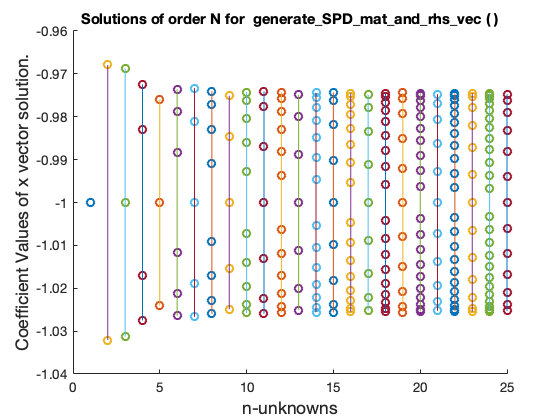

In [1]:
%plot inline 
N = [1,10,10^2,10^3];
ft = 13;
hold on
xlabel('n-unknowns','FontSize',ft)
ylabel('Coefficient Values of x vector solution.','FontSize',ft)
title('Solutions of order N for  generate\_SPD\_mat\_and\_rhs\_vec ( )')

for i = 1:25
    [A,b] = generate_SPD_mat_and_rhs_vec(i);
    x = gepp(A,b);
    x1 = i*ones(1,i);
    scatter(x1,x)
    plot(x1,x)
end

**2. (c) Running time of** `gepp(A,b)` **for **`N = [1,10,10^2,10^3]`
<br>*Justification: brief operation count for row reduction nested loop.* 
<br>(See Attachment).

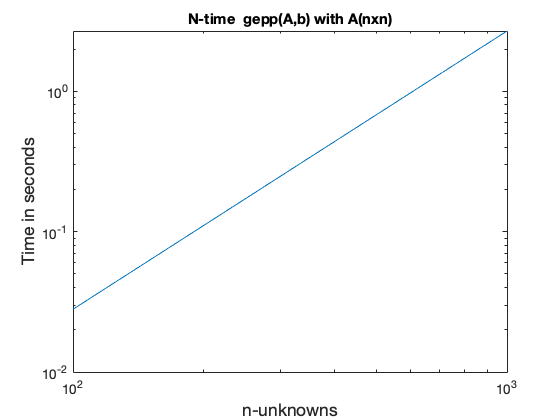

In [2]:
%plot inline
test_amount = [1,5,10,15,20,30];

for i = 1:length(N)
[A,b] = generate_SPD_mat_and_rhs_vec(N(i));
    for j = 1:test_amount(2)
        t = cputime;
        x = gepp(A,b);
        times(j) = cputime-t;
    end
supertime(i) = sum(times)/test_amount(2);
x_supertime(i) = N(i);
end

figure
%subplot(1,2,1)
loglog(x_supertime,supertime)
title('N-time  gepp(A,b) with A(nxn)')
xlabel('n-unknowns','FontSize',ft)
ylabel('Time in seconds','FontSize',ft)


**3. (a) Using `hilb ( )` and `cond ( )` to estimate Hilbert Matrix condition value: ** ***$ k(A)$***

In [3]:
clear, close, clc
warning('off','all') %suprressing ill-conditioned warnings in matlab, prettty nifty though
n = [6:12];
for i = 1:length(n)
    x_hilb = hilb(n(i));
    c_hilb(i) = cond(x_hilb,inf); %using infinite norm, quick to verify for this matrix, exaggerates results
end

Q1 = array2table([n;c_hilb;log10(c_hilb)]','VariableNames',...
    {'n','k_A','log_k_A'});
disp(' '),disp(Q1),disp(' ')

 
    n             k_A                 log_k_A     
    __    ____________________    ________________
     6          29070279.00116    7.46344919991913
     7        985194887.261114    8.99352214937083
     8        33872789109.7577    10.5298509582362
     9        1099649898389.87     12.041254438432
    10        35352948668981.5    13.5484256426665
    11    1.23050360776601e+15    15.0900828913672
    12    3.92020097586438e+16    16.5933083324469
 


**3. (b) Justifying true solution: ** 
<br>$ A \mathbf{x} = b$
<br>$\mathbf{x} = [\begin{array}{ccc} 1 ,1 ,1&...1\end{array}] $ 
<br> (See Attachment)

**3. (c) Using 3a results** Justification:
<br>(See Attachment)


**3. (d) Solve **$ A\mathbf{x} = b $ **using 'true'** `x = A\b` in `MatLab`.
<br> *Please see comments `%comments....`*

In [4]:
for i = 1:length(n)
    A = hilb(n(i)); %using hilb in matlab
    b = sum(A)'; %b solutions given by problem, column vec
    normA = max(b); %1 norm is equivalent max(sum(b)) per matrix
    x = A\b; %solving in matlab
    rel_x(i) = norm((x-1),2)/norm(ones(n(i),1),2); %computing 2 norm error for part f true-soution is 
    rel_res(i) = norm((b-A*x),2)/norm(b,2); %computing 2 norm resid, part f
    fprintf('\nFor n = %d\n1-Norm_A = %f',...
        [n(i), normA]) % displaying with 
    fprintf('\nThe Solution Vector is: \n') %displaying
    x, fprintf('') %displaying
end


For n = 6
1-Norm_A = 2.450000
The Solution Vector is: 
x =
         0.999999999998961
          1.00000000002959
         0.999999999800112
          1.00000000051939
         0.999999999427136
           1.0000000002256

For n = 7
1-Norm_A = 2.592857
The Solution Vector is: 
x =
         0.999999999992326
          1.00000000030682
          0.99999999704021
          1.00000001151844
         0.999999978866064
           1.0000000182742
         0.999999993996372

For n = 8
1-Norm_A = 2.717857
The Solution Vector is: 
x =
         0.999999999984676
          1.00000000078978
         0.999999989990508
          1.00000005290794
         0.999999860247882
          1.00000019465431
         0.999999863295195
          1.00000003813793

For n = 9
1-Norm_A = 2.828968
The Solution Vector is: 
x =
         0.999999999844692
            1.000000010464
         0.999999826098436
           1.0000012235899
         0.999995564503537
          1.00000896839932
         0.999989784833845
    

**3. (e)**
<br>
We can see a complete break down at about `n=12` with 
an extreme coefficient of.59 in the solution vector.
As `n -->8` we can rely on our computations with roughly 1 or 2 more digits
of accuracy to the right of the decimal, per `n-1`. 
<br>*This does seem to roughly
correspond with our expectations.*

**3. (f)** Displaying tabulated relative error and relative residual of solution. 
<br> See `line(6)` and `line(7)` of **3. (d)**

In [5]:
Q2 = array2table([n;rel_x;rel_res]','VariableNames',...
    {'n','Rel_Error','Rel_Residual'});
disp(' '),disp(Q2),disp(' ')

 
    n          Rel_Error              Rel_Residual    
    __    ____________________    ____________________
     6    3.39033488436214e-10    6.33850591412551e-17
     7    1.16995868296089e-08    2.89343156037305e-17
     8    1.00289408355228e-07    9.65347414073251e-17
     9    5.22582767401842e-06    7.91353887992229e-17
    10    0.000234397542907874    1.00009305751354e-16
    11     0.00219677941018994    1.13923032512967e-16
    12       0.189008635509025    1.20395373348548e-16
 


**3. (f)** Explain: As expected Gaussian Elmination with partial (scaled) pivoting produces a numerical solution such that the residual is small even though our hilbert matrices are very ill-conditioned which is really surprising.
However, running the script below, we see that the relative-residual*condition number is still greater than the relative-error in the solutions as expected.

In [6]:
for i = 1:length(n)
    x_hilb = hilb(n(i));
    c_hilb(i) = cond(x_hilb,2); %using 2 norm (because I used inf norm in part a)
end
rel_x <= c_hilb.*rel_res

ans =
  1x7 logical array
   1   1   1   1   1   1   1
